# Import all the necessary libraries

In [8]:
import pandas as pd
import glob
import os  # Make sure to import the os module
from textblob import TextBlob
import matplotlib.pyplot as plt



# Align the Dates Between


Correlation between sentiment and stock returns for ../data/cleaned_stock_data/cleaned_AAPL_historical_data.csv: -0.012183905291930804
Merged data with sentiment and returns saved to ../data/cleaned_stock_data/cleaned_AAPL_historical_data_with_sentiment_and_returns.csv


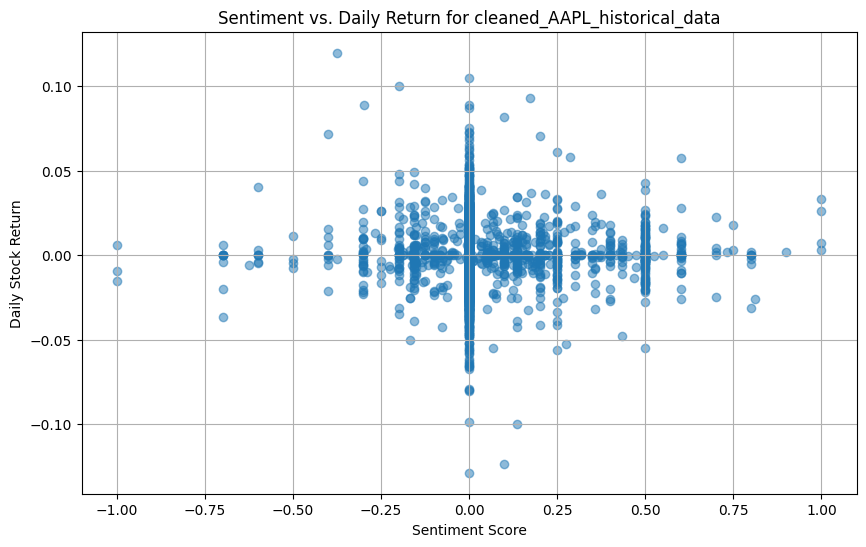

Correlation between sentiment and stock returns for ../data/cleaned_stock_data/cleaned_AMZN_historical_data.csv: -9.38839325819417e-05
Merged data with sentiment and returns saved to ../data/cleaned_stock_data/cleaned_AMZN_historical_data_with_sentiment_and_returns.csv


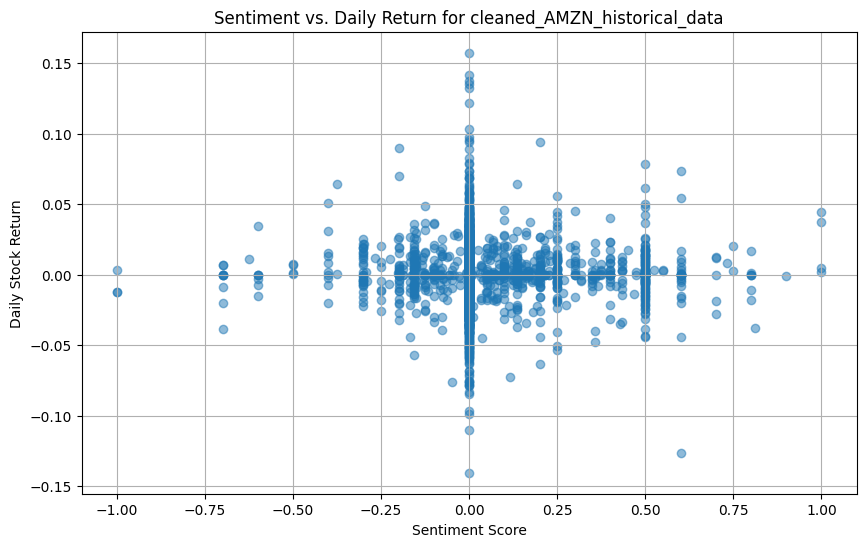

Correlation between sentiment and stock returns for ../data/cleaned_stock_data/cleaned_GOOG_historical_data.csv: 0.004713472179160312
Merged data with sentiment and returns saved to ../data/cleaned_stock_data/cleaned_GOOG_historical_data_with_sentiment_and_returns.csv


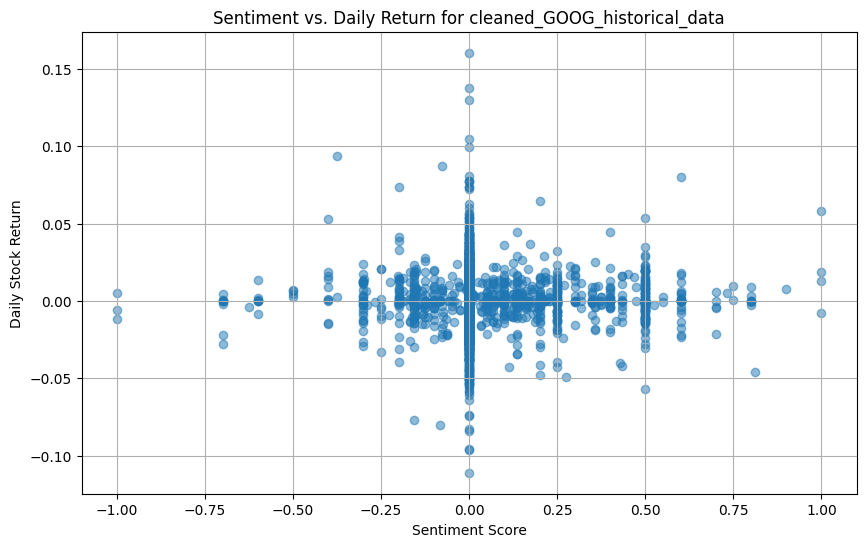

Correlation between sentiment and stock returns for ../data/cleaned_stock_data/cleaned_META_historical_data.csv: -0.010890230280926819
Merged data with sentiment and returns saved to ../data/cleaned_stock_data/cleaned_META_historical_data_with_sentiment_and_returns.csv


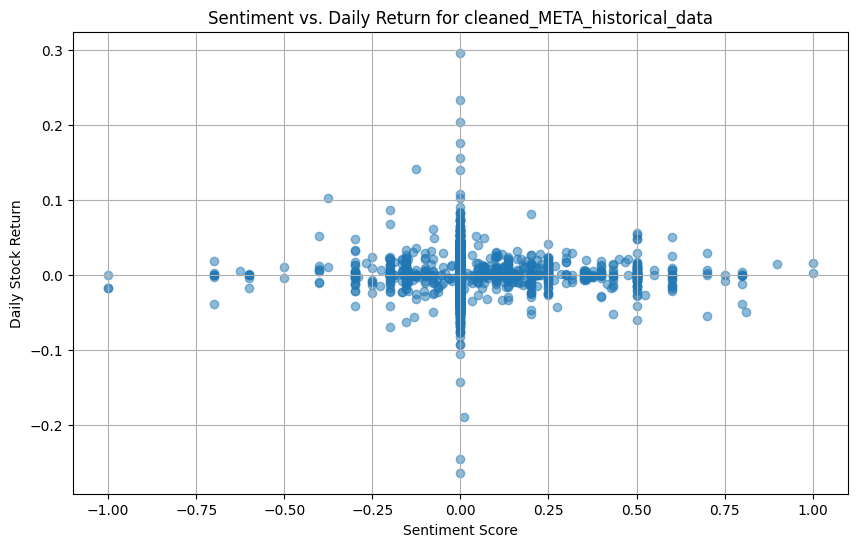

Correlation between sentiment and stock returns for ../data/cleaned_stock_data/cleaned_MSFT_historical_data.csv: 0.0007103464048162689
Merged data with sentiment and returns saved to ../data/cleaned_stock_data/cleaned_MSFT_historical_data_with_sentiment_and_returns.csv


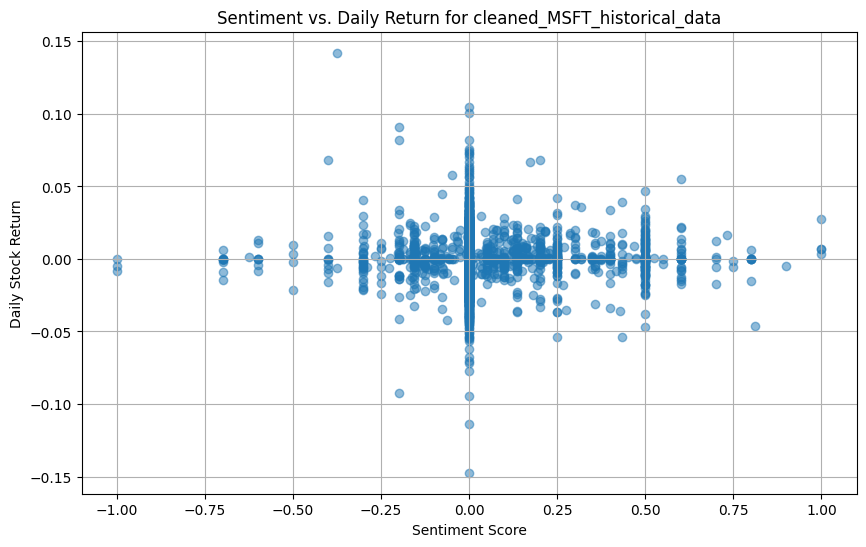

Correlation between sentiment and stock returns for ../data/cleaned_stock_data/cleaned_NVDA_historical_data.csv: -0.00636532055261185
Merged data with sentiment and returns saved to ../data/cleaned_stock_data/cleaned_NVDA_historical_data_with_sentiment_and_returns.csv


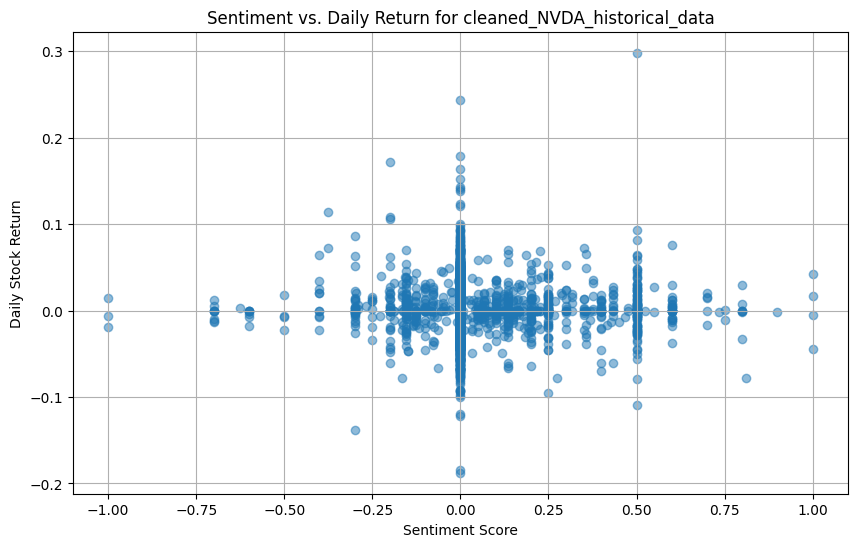

Correlation between sentiment and stock returns for ../data/cleaned_stock_data/cleaned_TSLA_historical_data.csv: 0.011453121854106293
Merged data with sentiment and returns saved to ../data/cleaned_stock_data/cleaned_TSLA_historical_data_with_sentiment_and_returns.csv


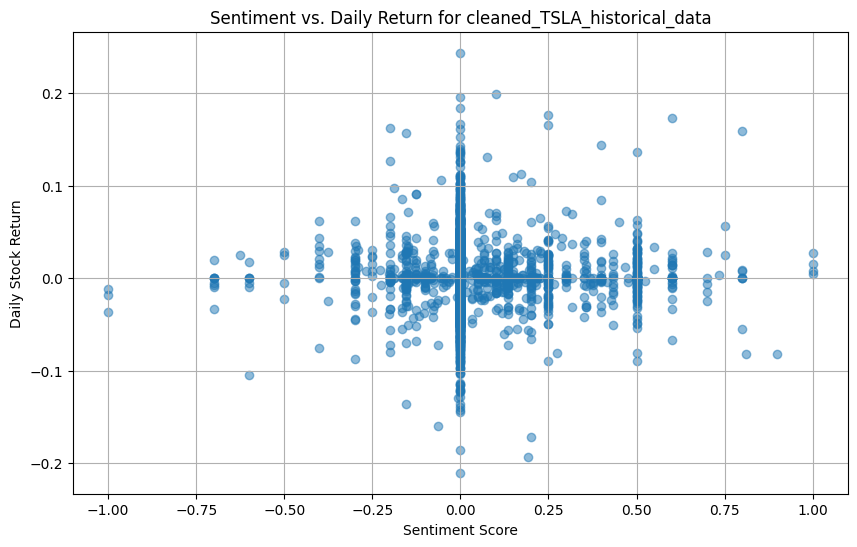

In [13]:

import matplotlib.pyplot as plt  # Importing matplotlib for plotting


# Load the cleaned_analyst_ratings dataset
cleaned_analyst_ratings = pd.read_csv('../data/cleaned_analyst_ratings.csv')

# Convert the Date column in cleaned_analyst_ratings to datetime
cleaned_analyst_ratings['Date'] = pd.to_datetime(cleaned_analyst_ratings['Date'], errors='coerce')

# List of individual CSV file paths
csv_files = [
    '../data/cleaned_stock_data/cleaned_AAPL_historical_data.csv',
    '../data/cleaned_stock_data/cleaned_AMZN_historical_data.csv',
    '../data/cleaned_stock_data/cleaned_GOOG_historical_data.csv',
    '../data/cleaned_stock_data/cleaned_META_historical_data.csv',
    '../data/cleaned_stock_data/cleaned_MSFT_historical_data.csv',
    '../data/cleaned_stock_data/cleaned_NVDA_historical_data.csv',
    '../data/cleaned_stock_data/cleaned_TSLA_historical_data.csv'
]

# Loop through each CSV file
for file in csv_files:
    # Load the current CSV file
    stock_data = pd.read_csv(file)

    # Convert the Date column to datetime format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

    # Align news dates to the closest previous trading day in the cleaned_analyst_ratings dataset
    stock_data['Aligned_Date'] = stock_data['Date'].apply(
        lambda x: cleaned_analyst_ratings[cleaned_analyst_ratings['Date'] <= x]['Date'].max()
    )

    # Merge the datasets based on the aligned dates and Symbol
    merged_data = pd.merge(
        stock_data,
        cleaned_analyst_ratings,
        left_on=['Aligned_Date'],
        right_on=['Date'],
        suffixes=('_stock', '_news')
    )

    # Sentiment Analysis on News Headlines
    merged_data['Sentiment'] = merged_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Calculate Daily Stock Returns (percentage change in daily closing prices)
    merged_data['Daily_Return'] = merged_data['Close'].pct_change()

    # Drop any rows with missing values
    merged_data.dropna(subset=['Sentiment', 'Daily_Return'], inplace=True)

    # Correlation Analysis between Daily News Sentiment and Stock Returns
    correlation = merged_data['Sentiment'].corr(merged_data['Daily_Return'])

    # Print the correlation result
    print(f"Correlation between sentiment and stock returns for {file}: {correlation}")

    # Optionally, save the merged data with sentiment scores and returns to a new CSV file
    merged_file_name = file.replace('.csv', '_with_sentiment_and_returns.csv')
    merged_data.to_csv(merged_file_name, index=False)

    print(f"Merged data with sentiment and returns saved to {merged_file_name}")

    # Plotting the Sentiment vs. Daily Return
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data['Sentiment'], merged_data['Daily_Return'], alpha=0.5)
    plt.title(f'Sentiment vs. Daily Return for {file.split("/")[-1].replace(".csv", "")}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Daily Stock Return')
    plt.grid(True)
    plt.show()